### Student Information
Name : 簡楷恒

Student ID : 113062582

GitHub ID : 73538884

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

---

### Part 1

https://github.com/k910723/DM2024-Lab1-Master/blob/main/DM2024-Lab1-Master.ipynb

---

### Part 2

#### 1. The data

In [2]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

C:\Users\k9107\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 2. Data Preparation

In [3]:
# the data is already pandas dataframe
print(df)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


#### 3. Data Transformation

In [4]:
# the data is already pandas dataframe
print(df)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


#### 4. Data Mining using Pandas

In [5]:
# check for missing values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [6]:
# check for duplicate data
sum(df.duplicated('comment'))

1

In [7]:
# drop duplicate data
df.drop_duplicates(keep=False, inplace=True)

#### 5.  Data Preprocessing


##### 5.1 Sampling

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

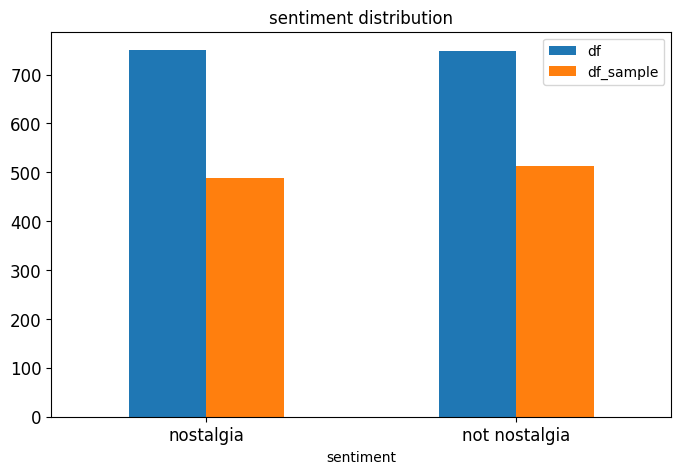

In [8]:
# sample 1000 records and draw their distribution
df_sample = df.sample(n=1000)

df_to_draw = pd.DataFrame({
    'df': df.sentiment.value_counts(),
    'df_sample': df_sample.sentiment.value_counts()
})
df_to_draw.plot(kind='bar', figsize=(8, 5), title='sentiment distribution', rot=0, fontsize=12)

##### 5.2 Feature Creation

In [9]:
# obtain the unigrams for each text and show the first 5 records
import nltk
nltk.download('punkt_tab')
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
print(df[0:5]['unigrams'])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\k9107\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
4    [listening, to, his, songs, reminds, me, of, m...
Name: unigrams, dtype: object


##### 5.3 Feature Subset Selection

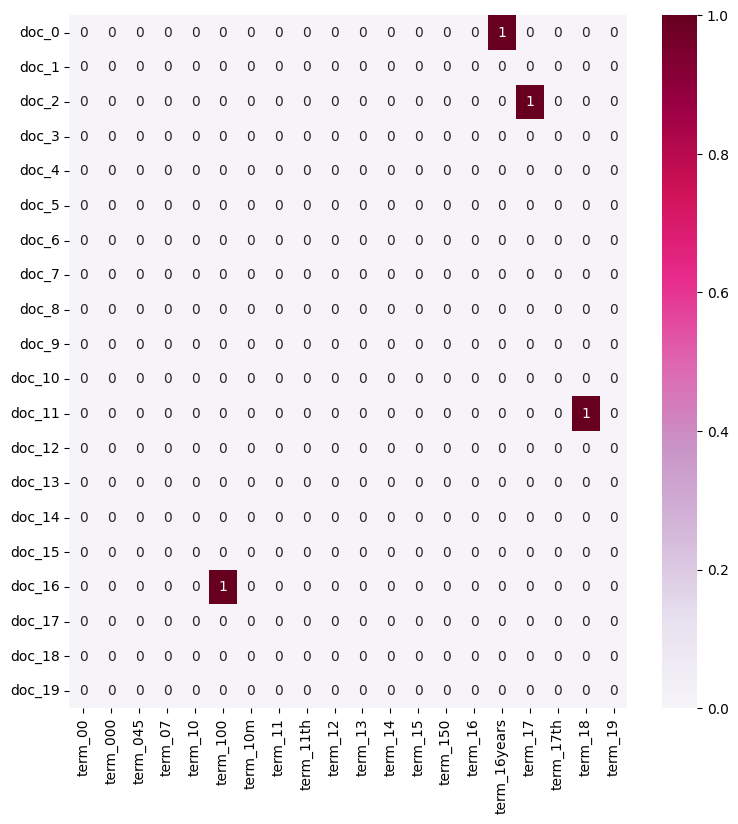

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# generate a document-term matrix from the original dataset
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix

# draw the heatmap for the first 20 records
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]] # obtain document index
plot_z = df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 9))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

##### 5.4 Attribute Transformation / Aggregation

In [11]:
import plotly.express as px
import numpy as np

# compute term frequencies
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_terms_df = pd.DataFrame({
    'term': count_vect.get_feature_names_out()[:100],
    'frequency': term_frequencies[:100]
})
# filter out words with frequency less than or equal to 1
top_terms_df = top_terms_df[top_terms_df['frequency'] > 1]
sorted_top_terms_df = top_terms_df.sort_values(by='frequency', ascending=False)

fig = px.bar(sorted_top_terms_df, x='term', y='frequency')
fig.show()

##### 5.5 Dimensionality Reduction

In [12]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# compute the term-document matrix
count_vect = CountVectorizer()
tdm_df = count_vect.fit_transform(df['comment'])
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary
tdm_df = pd.DataFrame(tdm_df.toarray(), columns=terms, index=df.index) # Convert the term-document matrix to a DataFrame

# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

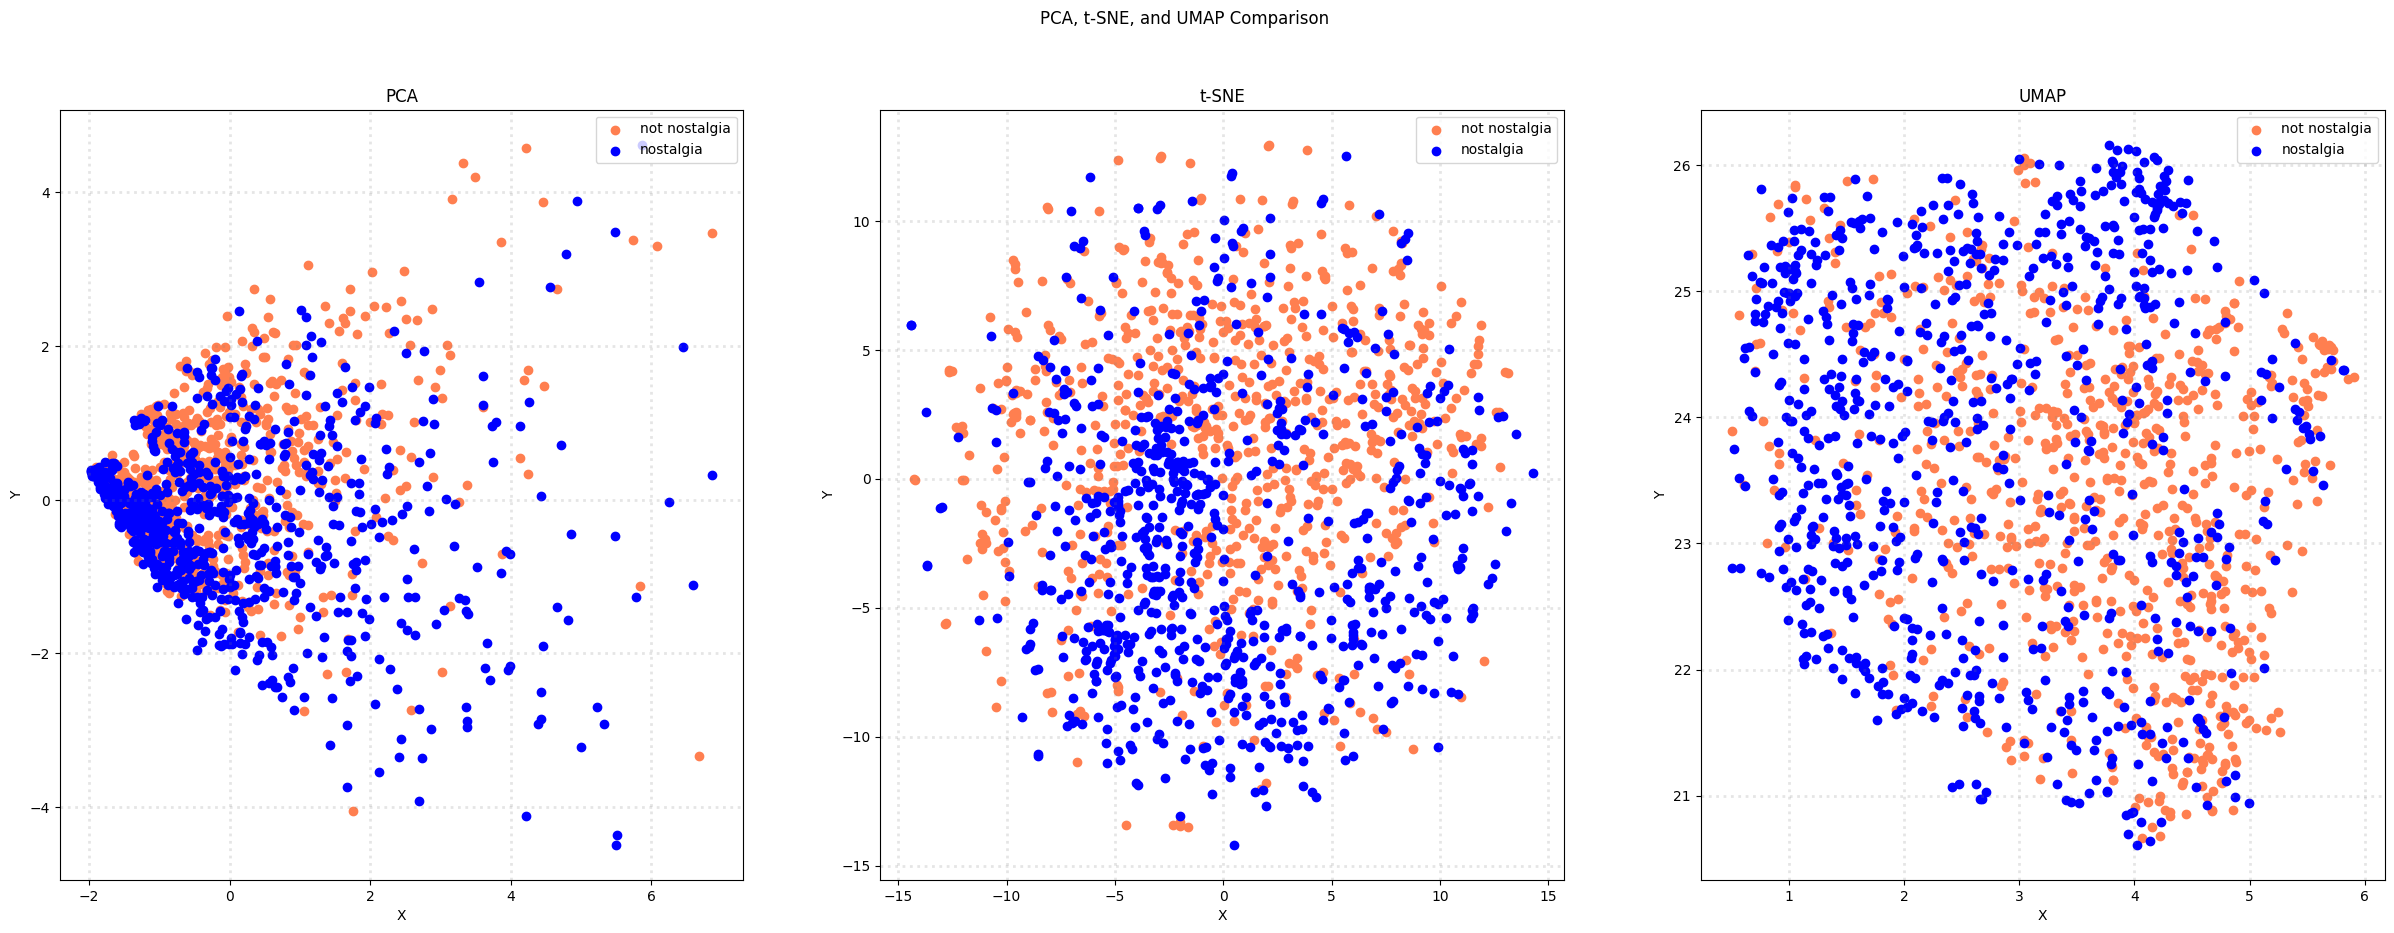

In [13]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, df_reduced, title):
    for c, category in zip(col, categories):
        xs = df_reduced[df['sentiment'] == category].T[0]
        ys = df_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

##### 5.6 Discretization and Binarization

In [14]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_category'] = mlb.transform(df['sentiment']).tolist()
print(df[0:9])

       sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

                                            unigrams bin_category  
0  [He, was, a, singer, with, a, golden, voice, t...          [1]  
1  [The, mist, beautiful, voice, ever, I, listene...          [0]  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...          [0]  
3  [30, day, leav

#### 6. Data Exploration

In [15]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Randomly sample 2 records
#random_records = df.sample(n=2, random_state=42)
random_records = df.sample(n=2)
print(random_records[['comment', 'sentiment']])

# Compute their cosine similarity
vectorized_comments = count_vect.transform(random_records['comment'])
cos_sim = cosine_similarity(vectorized_comments[0], vectorized_comments[1])
print(f"Cosine Similarity: {cos_sim[0][0]}")

                                               comment      sentiment
639  Can anyone tell me  who is the first actress f...  not nostalgia
544  wow! what a wonderful voice... his rendition o...  not nostalgia
Cosine Similarity: 0.0


#### 7. Data Classification

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

target_names = df['sentiment'].unique()

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8286    0.9486    0.8845       214
    nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



---

### Part 3

##### 3.1 New Data Visualization

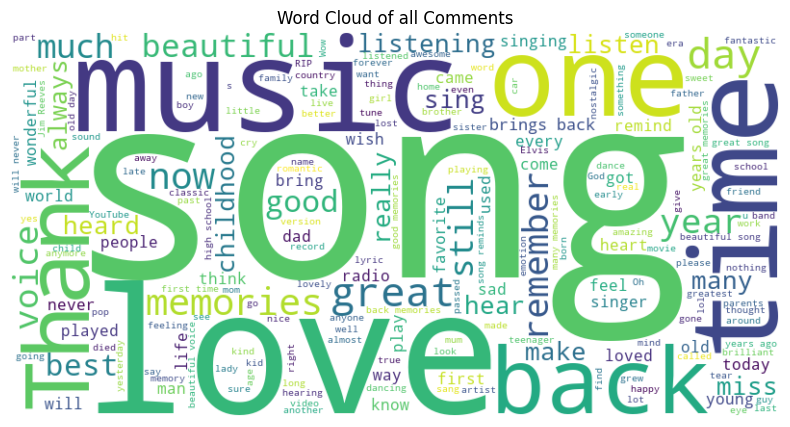

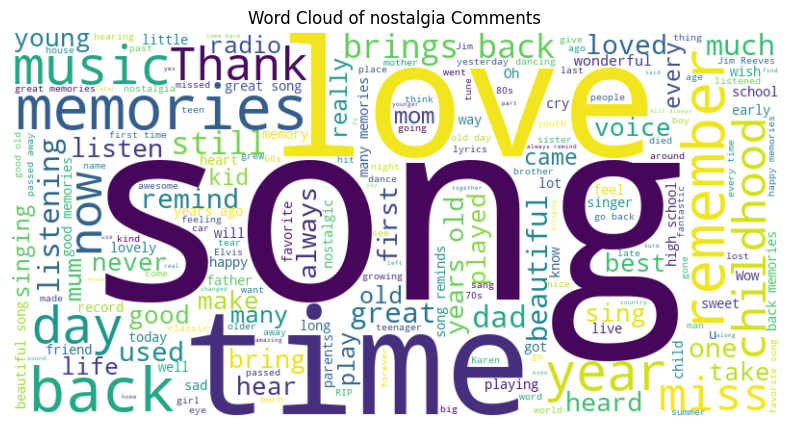

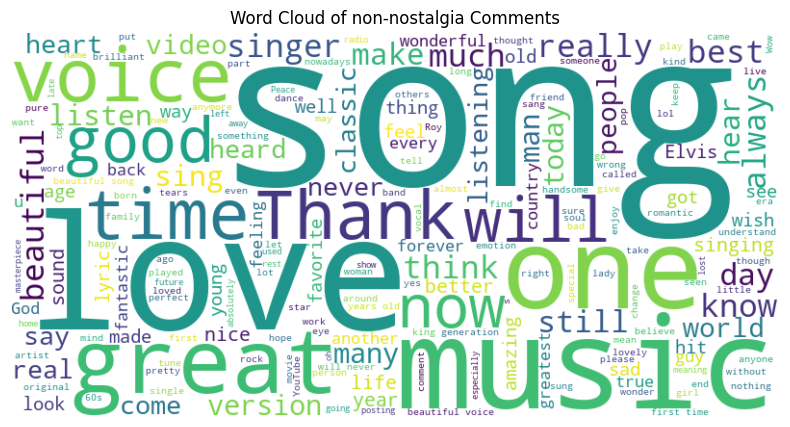

In [17]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_comments = ' '.join(df['comment'])
nostalgia_comments = ' '.join(df[df['sentiment'] == 'nostalgia']['comment'])
non_nostalgia_comments = ' '.join(df[df['sentiment'] == 'not nostalgia']['comment'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all Comments')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nostalgia_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of nostalgia Comments')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_nostalgia_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of non-nostalgia Comments')
plt.show()

# It can be observed that many nostalgia comments contains words like "childhood", "memories", "back", etc.

##### 3.2 TF-IDF Features

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_tdm = tfidf_vect.fit_transform(df['comment'])
tfidf_df = pd.DataFrame(tfidf_tdm.toarray(), columns=tfidf_vect.get_feature_names_out(), index=df.index)

print(tfidf_df[0:5])

    00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

   youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[5 rows x 3730 columns]


##### 3.3 Naive Bayes Classifier

In [19]:
target_names = df['sentiment'].unique()

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

# term frequency feature is slightly better than tf-idf according to the accuracy score and classification report

Accuracy: 0.8666666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8031    0.9533    0.8718       214
    nostalgia     0.9490    0.7881    0.8611       236

     accuracy                         0.8667       450
    macro avg     0.8761    0.8707    0.8665       450
 weighted avg     0.8796    0.8667    0.8662       450



---

### part 4

1. In 4.2, we can set the parameter "keep" to True. So we leave 1 record instead of dropping all the duplicated records.

2. In 5.1, we can use stratified sampling to ensure the distribution and structure are more similar to the original data.

3. In 5.2 ~ 5.7, we can try different strategy to obtain features and multiple methods to calculate the similarity. Additionally, we can use different classifier and compare their performance on the classification task.